# Sensitive Data and Description

some candidate sensitive datasets:
note that many FL algorithms that we learn work better with DNNs models, as such, image data receive the best performance.

https://www.kaggle.com/datasets/nih-chest-xrays/sample

In [2]:
import os
import pandas as pd
import kagglehub
from zipfile import ZipFile

# Download dataset via kagglehub
path = kagglehub.dataset_download("nih-chest-xrays/sample")
#path = '/root/.cache/kagglehub/datasets/nih-chest-xrays/sample/versions/4'
print("Path to dataset files:", path)

# Define paths to CSV and images
csv_path = os.path.join(path, 'sample_labels.csv')
images_dir = os.path.join(path, 'sample', 'images')

# Load CSV
df = pd.read_csv(csv_path)

# Add full image path
df['file_path'] = df['Image Index'].apply(lambda x: os.path.join(images_dir, x))

# Preview
print("Label distribution:\n", df['Finding Labels'].value_counts())
print("Data sample:\n", df.head())

Path to dataset files: /Users/admin/.cache/kagglehub/datasets/nih-chest-xrays/sample/versions/4
Label distribution:
 Finding Labels
No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: count, Length: 244, dtype: int64
Data sample:
         Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleu

In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,file_path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139,/Users/admin/.cache/kagglehub/datasets/nih-che...
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168,/Users/admin/.cache/kagglehub/datasets/nih-che...
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168,/Users/admin/.cache/kagglehub/datasets/nih-che...
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143,/Users/admin/.cache/kagglehub/datasets/nih-che...
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168,/Users/admin/.cache/kagglehub/datasets/nih-che...


In [3]:
df['View Position'].value_counts()

View Position
PA    3393
AP    2213
Name: count, dtype: int64

note on images per patient:
- in the full dataset and already available splitting of datasets, there are are imbalances in x-ray images for each sample 'Several concerns have been observed with the official split technique, in which the training and test datasets had different characteristics. This could be either due to a tremendous inconsistency in the label or the test set having an average of 3 times more photos per patient compared to the training set. Because of that, instead of using an official split, a custom split was used with random seed 2137. The new split was better balanced, had lower divergence, and did not use some images from single patients significantly more often than others.'
- multiple findings per sample --> these are multiple annotations for each x ray image, not necessary the conditions we want to diagnose. There is already a pre-existing list to reference which is the main condition to predict

In [4]:
# Function to process 'Patient Age'
def process_age(age):
    # Extract the numeric part and convert to int
    numeric_age = ''.join(filter(str.isdigit, age))

    # Check if the age is in months ('M') or days ('D') and convert accordingly
    if 'M' in age:
        return int(numeric_age) / 12  # Convert months to years
    elif 'D' in age:
        return int(numeric_age) / 365  # Convert days to years
    return int(numeric_age)  # If 'Y' is in age, keep it as years

# Apply the function to process 'Patient Age'
df['Patient Age'] = df['Patient Age'].apply(process_age)
df['Patient Age'] = df['Patient Age'].astype(int)

In [14]:
pathology_list = ['Hernia', #13
               'Pneumonia', # 62
               'Fibrosis', # 84
               'Edema', #118
               'Emphysema', #127 images
                'Cardiomegaly', #141 images
                'Pleural_Thickening', #176 images
                'Consolidation', #226 images
                'Pneumothorax', #271 images
                'Mass' #284 images
                'Nodule', #313 images
                'Atelectasis', #508 images
               'Effusion', #644 images
                'Infiltration', #967 images
                'No Finding'#3044 --> highly imbalanced towards No finding
]

In [5]:
# Drop unused labels:
df = df[['Image Index',
         'Finding Labels',
         'Follow-up #',
         'Patient ID',
         'Patient Age',
         'Patient Gender',
         'file_path',
         'View Position'
         ]]

class_names = sorted(set('|'.join(df['Finding Labels']).split('|')))

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

NameError: name 'pathology_list' is not defined

In [ ]:
# checking one row:
df.iloc[1]

,1
Image Index,00000013_026.png
Finding Labels,Cardiomegaly|Emphysema
Follow-up #,26
Patient ID,13
Patient Age,57
Patient Gender,M
file_path,/kaggle/input/sample/sample/images/00000013_02...
View Position,AP
Hernia,0
Pneumonia,0


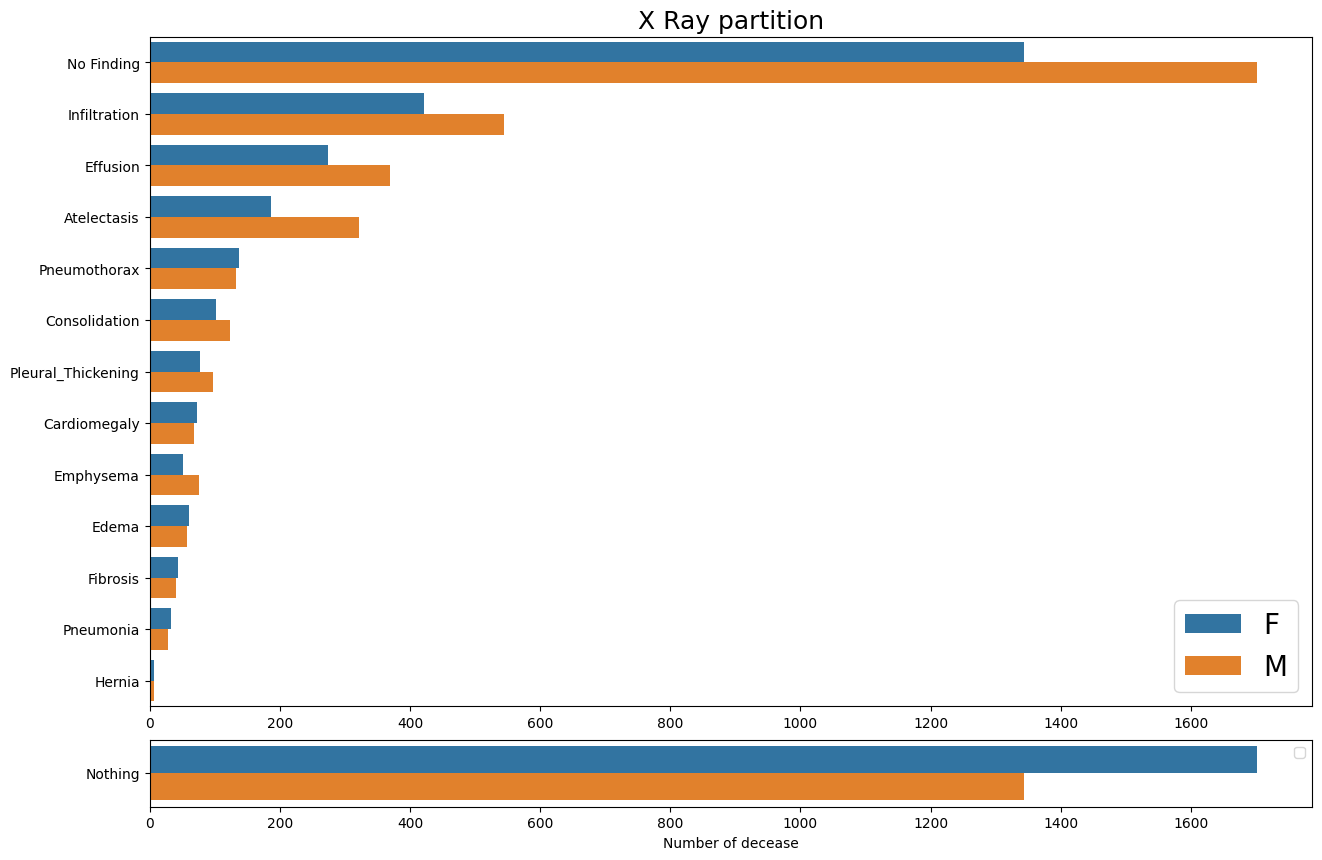

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np

plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])

data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]

g=sns.countplot(y='Category',hue='Patient Gender',
                data=data1, ax=ax1,
                order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')

data2 = data2.loc[data2.Count>0]

g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

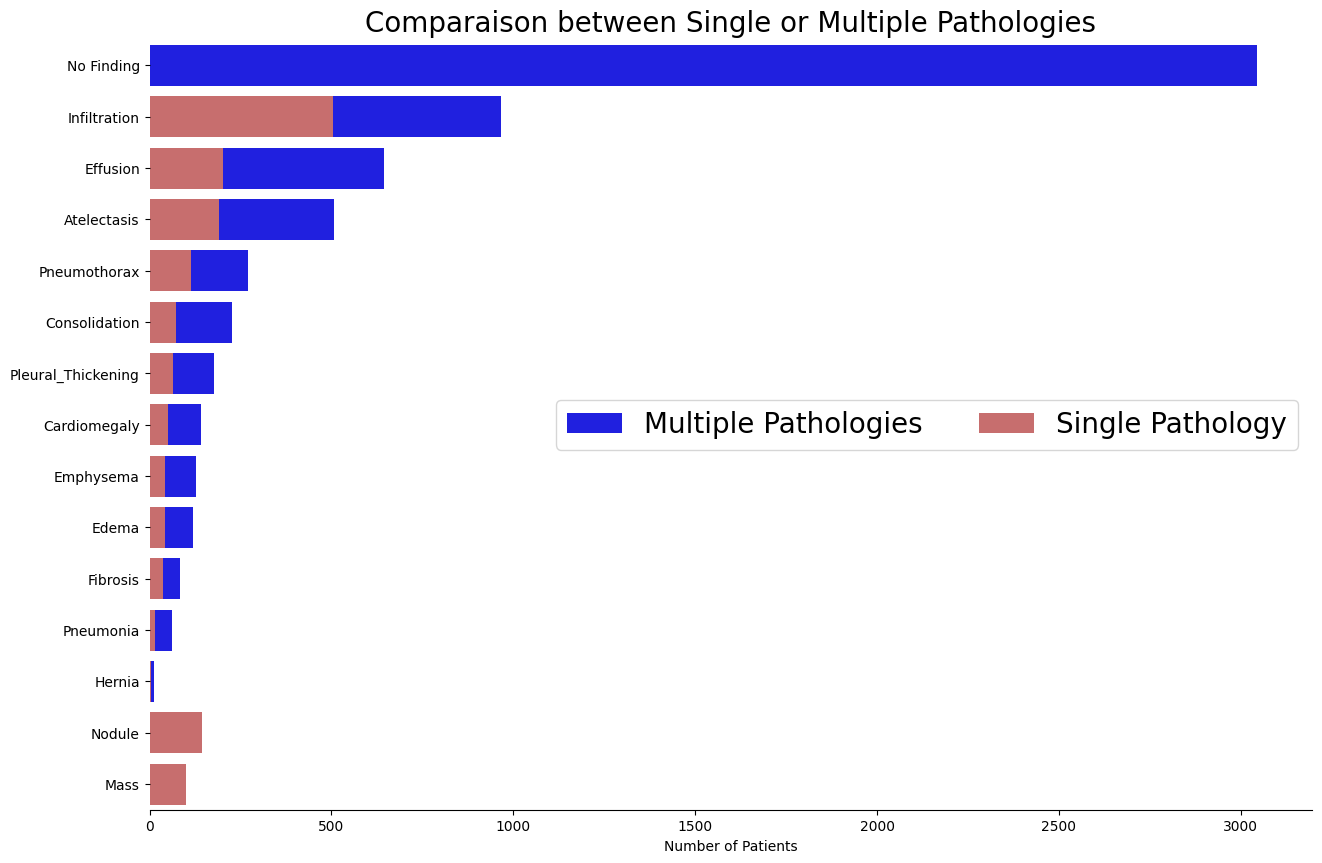

In [ ]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

f, ax = plt.subplots(sharex=True,figsize=(15, 10))
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="r",label="Single Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of Patients")
ax.set_title("Comparaison between Single or Multiple Pathologies",fontsize=20)
sns.despine(left=True)

Multiple Prediction Labels:
- multi-label medical image classification task, where each chest X-ray can be associated with zero, one, or more diseases
- Imbalanced label distribution, especially skewed towards 'No Finding'

Approaches to handling class imbalance:
- convert to binary classification, 'Pathological' vs 'Non-Pathological'
- downsample 'No Finding' to be similar to 'Infiltration'. Though, there is still class imbalance issue. Further, this reduce the total data set size to ~3300, and can be too little when split across clients in federated learning (about 5-20 clients)

In [5]:
# convert to binary classification:
df['label'] = df['Finding Labels'].apply(lambda x: 0 if x == 'No Finding' else 1)
print(df['label'].value_counts())

label
0    3044
1    2562
Name: count, dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image Index         5606 non-null   object
 1   Finding Labels      5606 non-null   object
 2   Follow-up #         5606 non-null   int64 
 3   Patient ID          5606 non-null   int64 
 4   Patient Age         5606 non-null   int64 
 5   Patient Gender      5606 non-null   object
 6   file_path           5606 non-null   object
 7   View Position       5606 non-null   object
 8   Hernia              5606 non-null   int64 
 9   Pneumonia           5606 non-null   int64 
 10  Fibrosis            5606 non-null   int64 
 11  Edema               5606 non-null   int64 
 12  Emphysema           5606 non-null   int64 
 13  Cardiomegaly        5606 non-null   int64 
 14  Pleural_Thickening  5606 non-null   int64 
 15  Consolidation       5606 non-null   int64 
 16  Pneumothorax        5606

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy relevant columns
df['age'] = pd.to_numeric(df['Patient Age'], errors='coerce')
df['gender'] = df['Patient Gender'].map({'M': 1, 'F': 0})
df['view'] = LabelEncoder().fit_transform(df['View Position'])

# Normalize age
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

# Evaluation and baseline functions

Privacy

Performance

computational efficiency

 communication overhead of the different methods

In [9]:
df = df[['file_path', 'label','age','gender','view']].copy()
df.rename(columns={'label': 'binary_label'}, inplace=True)
print(df['binary_label'].value_counts())
print(df.head())

binary_label
0    3044
1    2562
Name: count, dtype: int64
                                           file_path  binary_label       age  \
0  /Users/admin/.cache/kagglehub/datasets/nih-che...             1  0.759983   
1  /Users/admin/.cache/kagglehub/datasets/nih-che...             1  0.587681   
2  /Users/admin/.cache/kagglehub/datasets/nih-che...             0  1.736363   
3  /Users/admin/.cache/kagglehub/datasets/nih-che...             1  1.851232   
4  /Users/admin/.cache/kagglehub/datasets/nih-che...             1  0.472812   

   gender  view  
0       1     0  
1       1     0  
2       1     0  
3       1     1  
4       0     0  


# Baseline centralized Model
- Resnet
- obtain accuracy and loss on training and validation sets
- calculate time (computational efficiency)
- calculate privacy risks?

In [ ]:
import os
import random
import csv
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights


In [ ]:
# --- 1. Seed ---
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)

# --- 2. Dataset ---
class ChestXrayMultimodalDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        image = Image.open(row['file_path']).convert('RGB')
        label = row['binary_label']

        tabular = np.array([row['age'], row['gender'], row['view']], dtype=np.float32)
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(tabular), torch.tensor(label, dtype=torch.float32)

# --- 3. Transforms ---
def get_transforms(train=True):
    if train:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.1, contrast=0.1),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

# --- 4. Train/Eval Functions ---
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, tabular, labels in tqdm(loader, desc="Training", leave=False):
        images = images.to(device)
        tabular = tabular.to(device)
        labels = labels.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images, tabular)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        preds = torch.sigmoid(outputs) > 0.5
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    return total_loss / total, correct / total


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, tabular, labels in tqdm(loader, desc="Evaluating", leave=False):
            images = images.to(device)
            tabular = tabular.to(device)
            labels = labels.to(device).unsqueeze(1)

            outputs = model(images, tabular)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * labels.size(0)
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return total_loss / total, correct / total



class MultimodalResNet50(nn.Module):
    def __init__(self, tabular_input_dim=3):
        super().__init__()
        self.cnn = resnet50(pretrained=True)
        for param in self.cnn.parameters():
            param.requires_grad = False  # Freeze all layers
        self.cnn.fc = nn.Identity()  # Remove final FC layer

        # Tabular branch
        self.tabular_mlp = nn.Sequential(
            nn.Linear(tabular_input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )

        # Combined head
        self.classifier = nn.Sequential(
            nn.Linear(2048 + 8, 1)  # 2048 from ResNet50
        )

    def forward(self, image, tabular):
        image_feat = self.cnn(image)  # (B, 2048)
        tab_feat = self.tabular_mlp(tabular)  # (B, 8)
        combined = torch.cat((image_feat, tab_feat), dim=1)
        return self.classifier(combined)


# --- 5. Main ---

def main(df, output_csv='centralized_multimodal_resnet50.csv', max_epochs=30, patience=5):
    set_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # --- Split the data ---
    train_frac, val_frac = 0.7, 0.15
    train_size = int(train_frac * len(df))
    val_size = int(val_frac * len(df))
    test_size = len(df) - train_size - val_size

    train_df, val_df, test_df = random_split(df, [train_size, val_size, test_size],
                                             generator=torch.Generator().manual_seed(42))
    train_df = df.iloc[train_df.indices]
    val_df = df.iloc[val_df.indices]
    test_df = df.iloc[test_df.indices]

    # --- Dataloaders ---


    train_loader = DataLoader(ChestXrayMultimodalDataset(train_df, get_transforms(train=True)), batch_size=32, shuffle=True)
    val_loader = DataLoader(ChestXrayMultimodalDataset(val_df, get_transforms(train=False)), batch_size=32)
    test_loader = DataLoader(ChestXrayMultimodalDataset(test_df, get_transforms(train=False)), batch_size=32)

    # --- Multimodal Model ---
    model = MultimodalResNet50(tabular_input_dim=3).to(device)

    # --- Loss & Optimizer ---
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

    # --- CSV logging ---
    with open(output_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Epoch', 'Train Loss', 'Train Acc', 'Val Loss', 'Val Acc'])

    best_val_loss = float('inf')
    patience_counter = 0

    # --- Training Loop ---
    for epoch in range(1, max_epochs + 1):
        print(f"\nEpoch {epoch}/{max_epochs}")
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

        with open(output_csv, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow([epoch, train_loss, train_acc, val_loss, val_acc])

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_multimodal_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    # --- Final Evaluation ---
    print("\nLoading best model for final test evaluation...")
    model.load_state_dict(torch.load('best_multimodal_model.pt'))
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    print(f"\n✅ Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


main(df)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 208MB/s]



Epoch 1/30


Train Loss: 0.6828, Acc: 0.5487
Val   Loss: 0.6709, Acc: 0.6107

Epoch 2/30


Train Loss: 0.6699, Acc: 0.5958
Val   Loss: 0.6595, Acc: 0.6262

Epoch 3/30


Train Loss: 0.6607, Acc: 0.6119
Val   Loss: 0.6496, Acc: 0.6476

Epoch 4/30


Train Loss: 0.6529, Acc: 0.6361
Val   Loss: 0.6428, Acc: 0.6464

Epoch 5/30


Train Loss: 0.6480, Acc: 0.6318
Val   Loss: 0.6379, Acc: 0.6429

Epoch 6/30


Train Loss: 0.6468, Acc: 0.6430
Val   Loss: 0.6377, Acc: 0.6548

Epoch 7/30


Train Loss: 0.6429, Acc: 0.6478
Val   Loss: 0.6327, Acc: 0.6500

Epoch 8/30


Train Loss: 0.6390, Acc: 0.6448
Val   Loss: 0.6310, Acc: 0.6583

Epoch 9/30


Train Loss: 0.6369, Acc: 0.6476
Val   Loss: 0.6285, Acc: 0.6655

Epoch 10/30


Train Loss: 0.6324, Acc: 0.6521
Val   Loss: 0.6276, Acc: 0.6631

Epoch 11/30


Train Loss: 0.6367, Acc: 0.6478
Val   Loss: 0.6261, Acc: 0.6524

Epoch 12/30


Train Loss: 0.6316, Acc: 0.6537
Val   Loss: 0.6257, Acc: 0.6536

Epoch 13/30


Train Loss: 0.6312, Acc: 0.6514
Val   Loss: 0.6248, Acc: 0.6512

Epoch 14/30


Train Loss: 0.6326, Acc: 0.6570
Val   Loss: 0.6240, Acc: 0.6548

Epoch 15/30


Train Loss: 0.6296, Acc: 0.6552
Val   Loss: 0.6270, Acc: 0.6595

Epoch 16/30


Train Loss: 0.6275, Acc: 0.6514
Val   Loss: 0.6231, Acc: 0.6560

Epoch 17/30


Train Loss: 0.6308, Acc: 0.6544
Val   Loss: 0.6249, Acc: 0.6643

Epoch 18/30


Train Loss: 0.6343, Acc: 0.6465
Val   Loss: 0.6217, Acc: 0.6500

Epoch 19/30


Train Loss: 0.6256, Acc: 0.6588
Val   Loss: 0.6230, Acc: 0.6655

Epoch 20/30


Train Loss: 0.6299, Acc: 0.6504
Val   Loss: 0.6209, Acc: 0.6583

Epoch 21/30


Train Loss: 0.6280, Acc: 0.6521
Val   Loss: 0.6210, Acc: 0.6524

Epoch 22/30


Train Loss: 0.6264, Acc: 0.6537
Val   Loss: 0.6216, Acc: 0.6631

Epoch 23/30


Train Loss: 0.6310, Acc: 0.6514
Val   Loss: 0.6206, Acc: 0.6607

Epoch 24/30


Train Loss: 0.6264, Acc: 0.6565
Val   Loss: 0.6210, Acc: 0.6560

Epoch 25/30


Train Loss: 0.6283, Acc: 0.6595
Val   Loss: 0.6191, Acc: 0.6583

Epoch 26/30


Train Loss: 0.6281, Acc: 0.6527
Val   Loss: 0.6200, Acc: 0.6583

Epoch 27/30


Train Loss: 0.6229, Acc: 0.6697
Val   Loss: 0.6191, Acc: 0.6631

Epoch 28/30


Train Loss: 0.6216, Acc: 0.6692
Val   Loss: 0.6191, Acc: 0.6560

Epoch 29/30


Train Loss: 0.6278, Acc: 0.6532
Val   Loss: 0.6190, Acc: 0.6595

Epoch 30/30


Train Loss: 0.6274, Acc: 0.6442
Val   Loss: 0.6180, Acc: 0.6595

Loading best model for final test evaluation...



✅ Test Loss: 0.6285, Test Accuracy: 0.6413


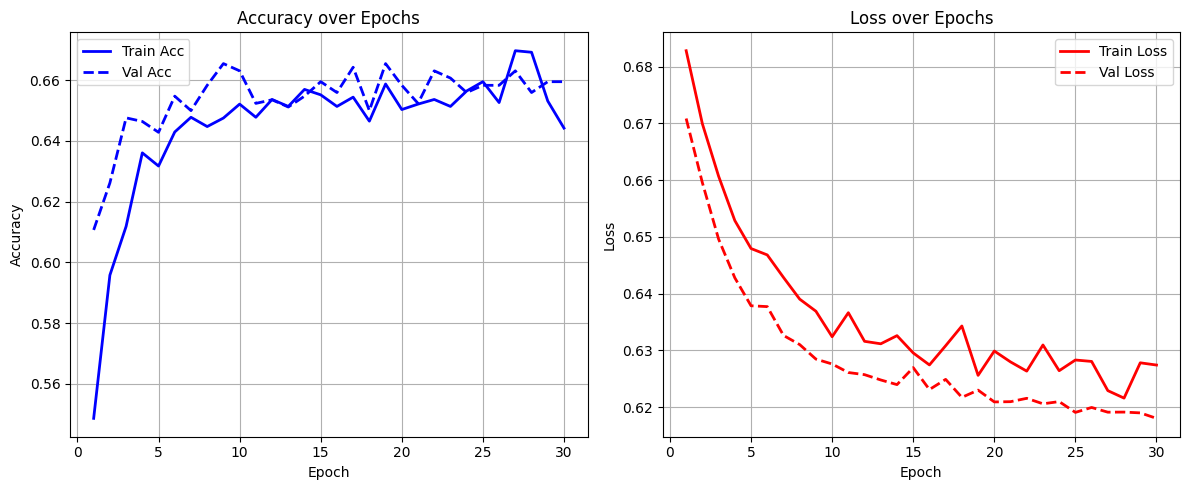

In [ ]:
# plotting loss and accuracy:
import matplotlib.pyplot as plt

df_metrics = pd.read_csv('/content/centralized_multimodal_resnet50.csv')

# Plot style
plt.figure(figsize=(12, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(df_metrics['Epoch'], df_metrics['Train Acc'], color='blue', label='Train Acc', linewidth=2)
plt.plot(df_metrics['Epoch'], df_metrics['Val Acc'], color='blue', linestyle='--', label='Val Acc', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(df_metrics['Epoch'], df_metrics['Train Loss'], color='red', label='Train Loss', linewidth=2)
plt.plot(df_metrics['Epoch'], df_metrics['Val Loss'], color='red', linestyle='--', label='Val Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Decentralized:
- fedavg
- fedprox
- fedAdam
https://medium.com/@entrepreneurbilal10/federated-learning-95d7a6435f08

In [10]:
import flwr
print("Your Flower version:", flwr.__version__)

2025-04-25 17:18:43,110	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Your Flower version: 1.18.0


In [11]:
from collections import OrderedDict
from typing import List, Tuple
import time
import csv
from pathlib import Path


import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split


import flwr
from flwr.client import Client, ClientApp, NumPyClient
from flwr.common import Metrics, Context
from flwr.server import ServerConfig, ServerAppComponents, ServerApp
from flwr.server.strategy import FedAvg, FedProx, fedadam
from flwr.server.strategy.fedopt import FedOpt
from flwr.simulation import run_simulation

ModuleNotFoundError: No module named '_lzma'

In [12]:
# === CONFIG ===
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
NUM_CLIENTS = 5
BATCH_SIZE = 32
NUM_ROUNDS = 20

In [13]:
#  -------------------------- Helper: Data Partition ----------------------------------------
# === DATASET AND MODEL ===
from torchvision import datasets, transforms
import torch

# === DATASET ===
class ChestXrayMultimodalDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        image = Image.open(row['file_path']).convert('RGB')
        label = row['binary_label']
        tabular = np.array([row['age'], row['gender'], row['view']], dtype=np.float32)
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(tabular), torch.tensor(label, dtype=torch.float32)

def load_datasets(partition_id): # with data partition
    transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    trainset = CXRDataset(train_df, "./nih_images/train/", transform=transform)
    testset = CXRDataset(test_df, "./nih_images/test/", transform=transform)

    partition_size = len(trainset) // NUM_CLIENTS
    diff = len(trainset) - partition_size * NUM_CLIENTS

    if diff  == 0:
      lengths = [partition_size] * NUM_CLIENTS
    else:
      lengths = [partition_size] * (NUM_CLIENTS - 1)
      lengths.append(partition_size + diff)

    datasets = random_split(trainset, lengths, torch.Generator().manual_seed(42))

    trainloader = []
    valloader = []

    for ds in datasets:
      val_len = len(ds) // 10
      train_len = len(ds) - val_len
      lens = [train_len, val_len]

      ds_train, ds_val =  random_split(ds, lens, torch.Generator().manual_seed(42))
      trainloader.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True))
      valloader.append(DataLoader(ds_val, batch_size=BATCH_SIZE))
    testloader = DataLoader(testset, batch_size=BATCH_SIZE)

    if partition_id == -1: # for whole dataset (no clients - centralized model)
      trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
      testloader = DataLoader(testset, batch_size=BATCH_SIZE)

      return trainloader, testloader

    return trainloader[partition_id], valloader[partition_id], testloader

In [14]:
#---------------------- Helper Function: Model Builder ------------------------------#
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultimodalNetNIH(nn.Module):
    def __init__(self, tabular_input_dim=3):
        super(MultimodalNetNIH, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.image_fc = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(512, 128), nn.ReLU(), nn.Dropout(0.5)
        )
        self.tabular_fc = nn.Sequential(
            nn.Linear(tabular_input_dim, 16), nn.ReLU(),
            nn.Linear(16, 8), nn.ReLU()
        )
        self.final_fc = nn.Sequential(
            nn.Linear(128 + 8, 1)
        )

    def forward(self, image, tabular):
        x_img = self.cnn(image)
        x_img = x_img.view(x_img.size(0), -1)
        x_img = self.image_fc(x_img)
        x_tab = self.tabular_fc(tabular)
        x = torch.cat((x_img, x_tab), dim=1)
        return torch.sigmoid(self.final_fc(x))


In [15]:
# === FL Utilities ===

def train(model, loader, epochs=1, fedprox_mu=0.0, global_params=None):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()
    for _ in range(epochs):
        for img, tabular, labels in loader:
            img, tabular, labels = img.to(DEVICE), tabular.to(DEVICE), labels.to(DEVICE).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(img, tabular)
            loss = criterion(outputs, labels)
            if fedprox_mu > 0 and global_params is not None:
                prox_term = 0.0
                for p1, p2 in zip(model.parameters(), global_params):
                    prox_term += (p1 - p2).norm(2)
                loss += (fedprox_mu / 2) * prox_term
            loss.backward()
            optimizer.step()

def evaluate(model, loader):
    model.eval()
    criterion = nn.BCELoss()
    y_true, y_pred, y_prob = [], [], []
    loss = 0.0
    with torch.no_grad():
        for img, tabular, labels in loader:
            img, tabular, labels = img.to(DEVICE), tabular.to(DEVICE), labels.to(DEVICE).unsqueeze(1)
            outputs = model(img, tabular)
            probs = outputs
            preds = (probs > 0.5).float()
            loss += criterion(probs, labels).item() * labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_prob.extend(probs.cpu().numpy())
    loss /= len(loader.dataset)
    return loss, y_true, y_pred, y_prob

In [16]:
# ---------------------- ClientClass -----------------------------------------------
import flwr as fl
from flwr.common import NDArray

# helper functions to update the local model with parameters received from the server and to get the updated model parameters:
def set_parameters(model, parameters):
    state_dict = OrderedDict({k: torch.tensor(v) for k, v in zip(model.state_dict().keys(), parameters)})
    model.load_state_dict(state_dict, strict=True)

def get_parameters(model):
    return [val.cpu().numpy() for _, val in model.state_dict().items()]

class FlowerClient(fl.client.NumPyClient):
    def __init__(self, model, trainloader, valloader, strategy="fedavg", config=None):
        self.model = model
        self.trainloader = trainloader
        self.valloader = valloader
        self.strategy = strategy
        self.config = config or {}

    def get_parameters(self, config):
        return get_parameters(self.model)

    def fit(self, parameters, config):
        set_parameters(self.model, parameters)
        global_params = [p.clone().detach() for p in self.model.parameters()]
        mu = self.config.get("proximal_mu", 0.0) if self.strategy == "fedprox" else 0.0
        train(self.model, self.trainloader, epochs=1, fedprox_mu=mu, global_params=global_params)
        return get_parameters(self.model), len(self.trainloader.dataset), {}

    def evaluate(self, parameters, config):
        set_parameters(self.model, parameters)
        loss, y_true, y_pred, y_prob = evaluate(self.model, self.valloader)
        return float(loss), len(self.valloader.dataset), {
            "accuracy": accuracy_score(y_true, y_pred),
            "auc": roc_auc_score(y_true, y_prob),
            "precision": precision_score(y_true, y_pred),
            "recall": recall_score(y_true, y_pred)
        }

In [28]:
# === ClientApp ===:
def client_fn(cid):
    model = MultimodalNetNIH().to(DEVICE)
    trainloader, valloader, _ = load_datasets(partition_id=int(cid))
    return FlowerClient(model, trainloader, valloader)

def client_fn(context: Context) -> Client:
    """Create a Flower client representing a single organization."""

    # Use custom multimodal model
    net = MultimodalNetNIH().to(DEVICE)

    # Read partition ID assigned to this client
    partition_id = context.node_config["partition-id"]

    # Load the corresponding partitioned data
    trainloader, valloader, _ = load_datasets(partition_id=partition_id)

    # Wrap in custom FlowerClient implementation
    return FlowerClient(net, trainloader, valloader).to_client()

# Instantiate ClientApp
client = ClientApp(client_fn=client_fn)

# FedAvg

In [30]:
# == define strategy ==
# Create FedAvg strategy
strategy = FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=10,  # Never sample less than 10 clients for training
    min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
    min_available_clients=10,  # Wait until all 10 clients are available
)

# === GLOBAL METRIC LOG ===
results_log = []
metric_log_path = Path("fl_server_results.csv")

# === Custom weighted average function with logging ===
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    total_examples = sum(num_examples for num_examples, _ in metrics)

    # Support multiple metrics
    keys = metrics[0][1].keys()
    aggregated = {
        k: sum(num_examples * m[k] for num_examples, m in metrics) / total_examples
        for k in keys
    }

    results_log.append(aggregated)
    return aggregated

# === Server factory function ===
def server_fn(context: Context) -> ServerAppComponents:
    """Construct server behaviour with strategy + logging."""

    strategy = FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=0.5,
        min_fit_clients=10,
        min_evaluate_clients=5,
        min_available_clients=10,
        evaluate_metrics_aggregation_fn=weighted_average,  # log & aggregate
    )

    config = ServerConfig(num_rounds=5)
    return ServerAppComponents(strategy=strategy, config=config)

# === Instantiate server ===
server = ServerApp(server_fn=server_fn)


# == configuration ==
backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 0.0}}

# When running on GPU, assign an entire GPU for each client
if DEVICE == "cuda":
    backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 1.0}}


# === Run simulation with timing ===
start = time.time()
run_simulation(
    server_app=server,
    client_app=client,
    num_supernodes=NUM_CLIENTS,
    backend_config=backend_config,
)
duration = time.time() - start
print(f"✅ Simulation completed in {duration:.2f} seconds")

# === Save global results to CSV ===
if results_log:
    fieldnames = results_log[0].keys()
    with open(metric_log_path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for row in results_log:
            writer.writerow(row)
    print(f"✅ Server metrics saved to: {metric_log_path}")

INFO :      Starting Flower ServerApp, config: num_rounds=5, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client


ERROR :     Backend `ray`, is not supported. Use any of [] or add support for a new backend.
ERROR :     Unable to import module `ray`.

    To install the necessary dependencies, install `flwr` with the `simulation` extra:

        pip install -U "flwr[simulation]"
    
ERROR :     An exception occurred !! 'ray'
ERROR :     Traceback (most recent call last):
  File "/Users/admin/myenv/lib/python3.13/site-packages/flwr/simulation/run_simulation.py", line 370, in _main_loop
    vce.start_vce(
    ~~~~~~~~~~~~~^
        num_supernodes=num_supernodes,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<9 lines>...
        flwr_dir=flwr_dir,
        ^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Users/admin/myenv/lib/python3.13/site-packages/flwr/server/superlink/fleet/vce/vce_api.py", line 331, in start_vce
    raise ex
  File "/Users/admin/myenv/lib/python3.13/site-packages/flwr/server/superlink/fleet/vce/vce_api.py", line 319, in start_vce
    backend_type = supported_backends[backend_name]
       

KeyboardInterrupt: 

# FedProx

In [ ]:
# == define strategy ==
# Create FedAvg strategy
strategy = FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=10,  # Never sample less than 10 clients for training
    min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
    min_available_clients=10,  # Wait until all 10 clients are available
)

# === GLOBAL METRIC LOG ===
results_log = []
metric_log_path = Path("fl_server_results.csv")

# === Custom weighted average function with logging ===
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    total_examples = sum(num_examples for num_examples, _ in metrics)

    # Support multiple metrics
    keys = metrics[0][1].keys()
    aggregated = {
        k: sum(num_examples * m[k] for num_examples, m in metrics) / total_examples
        for k in keys
    }

    results_log.append(aggregated)
    return aggregated

# === Server factory function ===
def server_fn(context: Context) -> ServerAppComponents:
    """Construct server behaviour with strategy + logging."""

    strategy = FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=0.5,
        min_fit_clients=10,
        min_evaluate_clients=5,
        min_available_clients=10,
        evaluate_metrics_aggregation_fn=weighted_average,  # log & aggregate
    )

    config = ServerConfig(num_rounds=5)
    return ServerAppComponents(strategy=strategy, config=config)

# === Instantiate server ===
server = ServerApp(server_fn=server_fn)


# == configuration ==
backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 0.0}}

# When running on GPU, assign an entire GPU for each client
if DEVICE == "cuda":
    backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 1.0}}


# === Run simulation with timing ===
start = time.time()
run_simulation(
    server_app=server,
    client_app=client,
    num_supernodes=NUM_CLIENTS,
    backend_config=backend_config,
)
duration = time.time() - start
print(f"✅ Simulation completed in {duration:.2f} seconds")

# === Save global results to CSV ===
if results_log:
    fieldnames = results_log[0].keys()
    with open(metric_log_path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for row in results_log:
            writer.writerow(row)
    print(f"✅ Server metrics saved to: {metric_log_path}")

# FedAdam

In [ ]:
# == define strategy ==
# Create FedAvg strategy
strategy = FedAvg(
    fraction_fit=1.0,  # Sample 100% of available clients for training
    fraction_evaluate=0.5,  # Sample 50% of available clients for evaluation
    min_fit_clients=10,  # Never sample less than 10 clients for training
    min_evaluate_clients=5,  # Never sample less than 5 clients for evaluation
    min_available_clients=10,  # Wait until all 10 clients are available
)

# === GLOBAL METRIC LOG ===
results_log = []
metric_log_path = Path("fl_server_results.csv")

# === Custom weighted average function with logging ===
def weighted_average(metrics: List[Tuple[int, Metrics]]) -> Metrics:
    total_examples = sum(num_examples for num_examples, _ in metrics)

    # Support multiple metrics
    keys = metrics[0][1].keys()
    aggregated = {
        k: sum(num_examples * m[k] for num_examples, m in metrics) / total_examples
        for k in keys
    }

    results_log.append(aggregated)
    return aggregated

# === Server factory function ===
def server_fn(context: Context) -> ServerAppComponents:
    """Construct server behaviour with strategy + logging."""

    strategy = FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=0.5,
        min_fit_clients=10,
        min_evaluate_clients=5,
        min_available_clients=10,
        evaluate_metrics_aggregation_fn=weighted_average,  # log & aggregate
    )

    config = ServerConfig(num_rounds=5)
    return ServerAppComponents(strategy=strategy, config=config)

# === Instantiate server ===
server = ServerApp(server_fn=server_fn)


# == configuration ==
backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 0.0}}

# When running on GPU, assign an entire GPU for each client
if DEVICE == "cuda":
    backend_config = {"client_resources": {"num_cpus": 1, "num_gpus": 1.0}}


# === Run simulation with timing ===
start = time.time()
run_simulation(
    server_app=server,
    client_app=client,
    num_supernodes=NUM_CLIENTS,
    backend_config=backend_config,
)
duration = time.time() - start
print(f"✅ Simulation completed in {duration:.2f} seconds")

# === Save global results to CSV ===
if results_log:
    fieldnames = results_log[0].keys()
    with open(metric_log_path, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for row in results_log:
            writer.writerow(row)
    print(f"✅ Server metrics saved to: {metric_log_path}")

In [74]:
# === PRIVACY ATTACK: MIA ===
def run_membership_inference_attack(model, train_loader, test_loader):
    model.eval()
    train_confidences, test_confidences = [], []

    with torch.no_grad():
        for x_img, x_tab, y in train_loader:
            x_img, x_tab = x_img.to(DEVICE), x_tab.to(DEVICE)
            output = model(x_img, x_tab)
            confidence = torch.sigmoid(output).squeeze().cpu().numpy()
            train_confidences.extend(confidence)

        for x_img, x_tab, y in test_loader:
            x_img, x_tab = x_img.to(DEVICE), x_tab.to(DEVICE)
            output = model(x_img, x_tab)
            confidence = torch.sigmoid(output).squeeze().cpu().numpy()
            test_confidences.extend(confidence)

    labels = [1] * len(train_confidences) + [0] * len(test_confidences)
    scores = train_confidences + test_confidences
    auc = roc_auc_score(labels, scores)
    print(f"[Privacy Risk] Membership Inference Attack AUC: {auc:.4f}")
    return auc